In [ ]:
Naive Bayes

Số lượng ảnh: 450
Số lượng nhãn: 450
Kích thước mỗi ảnh (sau khi flatten): (65536,)
Các nhãn: [0 1 2]


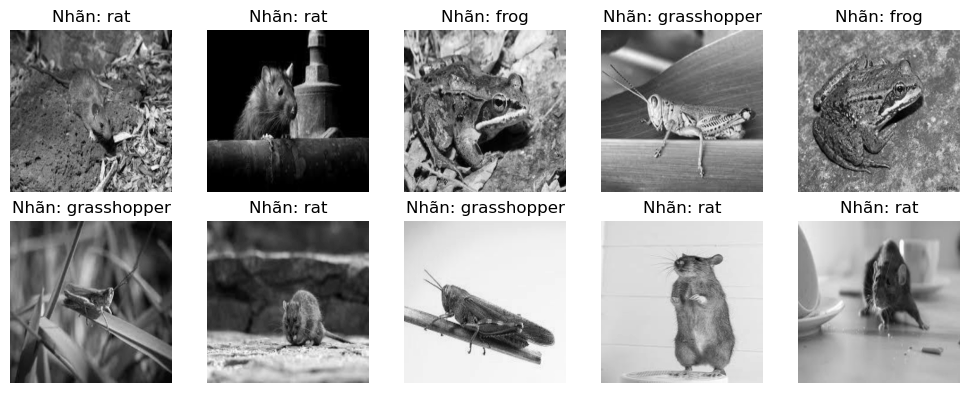

Độ chính xác: 0.5333333333333333

Báo cáo phân loại:
              precision    recall  f1-score   support

        frog       0.55      0.80      0.65        35
 grasshopper       0.45      0.61      0.52        23
         rat       0.75      0.19      0.30        32

    accuracy                           0.53        90
   macro avg       0.58      0.53      0.49        90
weighted avg       0.60      0.53      0.49        90


Confusion Matrix:
[[28  7  0]
 [ 7 14  2]
 [16 10  6]]


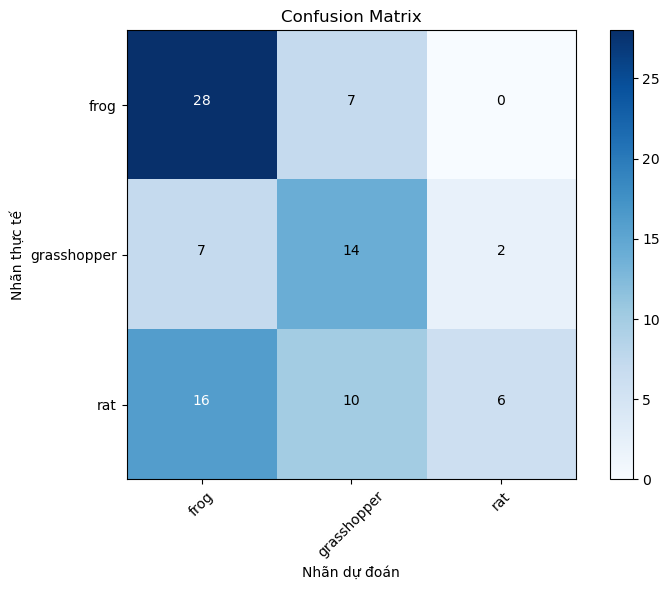

In [2]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random

# Cài đặt đường dẫn
data_dir = "/home/ultimatebrok/Documents/image/animaldata/final_dataset/"  # Thay đổi đường dẫn nếu cần
classes = ["frog", "grasshopper", "rat"]
img_size = 256

# Hàm hỗ trợ
def load_and_preprocess_image(image_path):
    """Tải ảnh, chuyển về ảnh xám và resize."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    return cv2.resize(img, (img_size, img_size))

# 1. Thu thập và tiền xử lý dữ liệu
data = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = load_and_preprocess_image(image_path)
        if img is not None:
            data.append(img.flatten())  # Chuyển ảnh 2D thành vector 1D
            labels.append(classes.index(class_name))

data = np.array(data)
labels = np.array(labels)

# 2. Tìm hiểu tập dữ liệu
print("Số lượng ảnh:", len(data))
print("Số lượng nhãn:", len(labels))
print("Kích thước mỗi ảnh (sau khi flatten):", data[0].shape)
print("Các nhãn:", np.unique(labels))

# Hiển thị một số ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    random_index = random.randint(0, len(data) - 1)
    ax.imshow(data[random_index].reshape(img_size, img_size), cmap='gray')
    ax.set_title(f"Nhãn: {classes[labels[random_index]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 4. Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=classes))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hiển thị confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.tight_layout()
plt.show()